### Paso 1: Planteamiento del problema y recopilación de datos

In [2]:
###################################
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import json

current_dir = os.getcwd()
path_config = os.path.join(current_dir, "../models")
url = os.path.join(current_dir, "../data/raw/medical_insurance_cost.csv")
data = pd.read_csv(url, sep=",")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
# Comentarios
#loan y housing -> tiene prestamo
# DEFINIR EL PROBLEMA: POR DEFECTO [LISTAS VACÍAS]
target = "charges"    # el target u objetivo del modelo
categorical_variable = ["sex","smoker","region"]  # Variables categóricas
drop_columns = [] # columnas para hacer drop por falta de relevancia
factors_associated_target = []   # factores asociados al target. Relación del target con las predictoras. Subjetivo.
categoric_target = False


Se decide no eliminar ninguna columna.

### Paso 2: Exploración y limpieza de datos

In [5]:
# Obtener las dimensiones
data.shape

(1338, 7)

In [6]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
nan = data.isna().sum()
nan

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

- Existen un total de 1338 filas y 7 columnas, de entre las que encontramos el objetivo o clase a predecir, `charges`.
- No hay valores nulos, el resto de variables cuentan siempre con valor.
- Los datos cuentan con 3 características numéricas y 3 características categóricas 'age', 'bmi', 'children', 'charges', 'sex_n','smoker_n','region_n').

#### Eliminar duplicados
Se decide eliminar `drop_columns`, ya que se observa son poco o nada relevantes para el precio.

In [9]:
drop_columns

[]

In [10]:
nan_percentage = data.isna().mean()*100
# Identificar las columnas con más del 90% de NaN y eliminarlas directamente
columns_to_drop = nan[nan_percentage > 90].index
print(columns_to_drop)
# Eliminar las columnas
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

data

Index([], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
duplicated_row = data.duplicated().sum()
duplicated_row

np.int64(1)

In [12]:

if(duplicated_row==0):
    print("No hay duplicados")
else:
    print("Si hay duplicados, se procede a eliminarlos")

Si hay duplicados, se procede a eliminarlos


Se encuentra un valor duplicado.

In [13]:
# data = data.drop_duplicates(subset = data.columns.difference(["id"]))
# data.shape

In [14]:
# ELIMINAR DUPLICADOS, ESPECIFICAR CON .difference(["id"] SI ES NECESARIO
data = data.drop_duplicates(subset = data.columns)
print(data.shape)
data.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Se procede a eliminar las columnas que hayamos definido en `drop_columns` cuando hemos definido el problema.

In [15]:
if(len(drop_columns) > 0):   # si drop_columns tiene valores y no está vacío entra
    data = data.drop(drop_columns, axis = 1)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

In [17]:
categorical_variable

['sex', 'smoker', 'region']

Variables categóricas
Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son:
 'sex', 'smoker', 'region'.

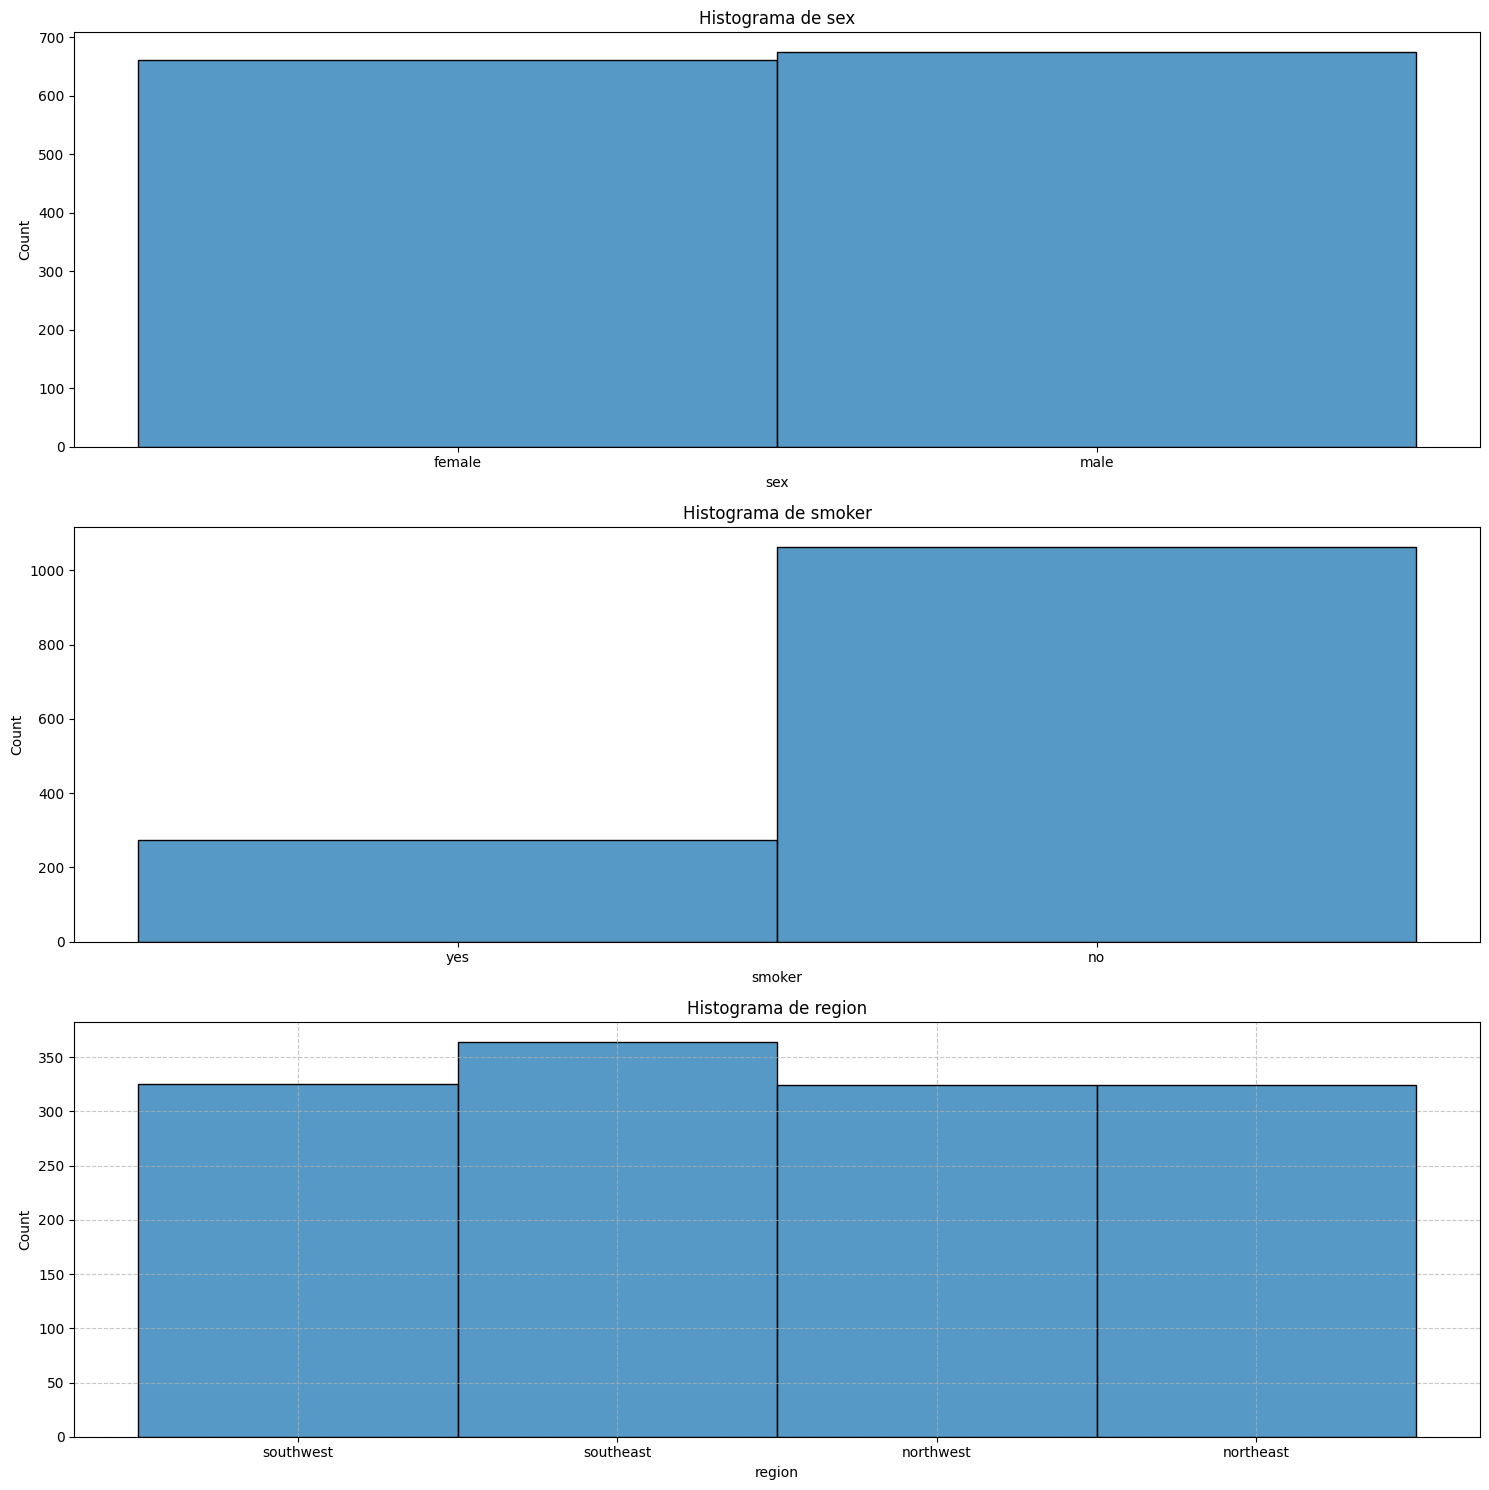

In [18]:
if(categorical_variable):
    fig, axis = plt.subplots(len(categorical_variable), 1,figsize = (15, 5*len(categorical_variable)))

    if len(categorical_variable) == 1:
        axis = [axis]   # convertir en lista para que no me salga error

    for i,col in enumerate(categorical_variable):
        # Crear un histograma múltiple
        sns.histplot( data = data, ax=axis[i], x = col)
        axis[i].set_title(f'Histograma de {col}')
        # grid
        plt.grid(linestyle="--", alpha=0.7)
        # Ajustar el layout
        plt.tight_layout()

        # Rotación automática de las etiquetas del eje X si es necesario.
        # category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        # if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
        #     axis[i].set_xticklabels([])
        # elif len(category_counts) >= 8:
        #     for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X

    # Mostrar el plot
    plt.show()
else:
    print("categorical_variable está vacío, debe llenarse para poder representarse")

In [19]:
categorical_variable

['sex', 'smoker', 'region']

- sex: Se observa una proporción igual de hombres y mujeres.
- smoker: Se observa que el número de NO fumadores es mayor que el de fumadores.
- region: Se observa que la proporción de personas por región es igual.

#### Análisis sobre variables numéricas

Antes de comenzar a graficar, debemos identificar cuáles son las numéricas, que son 'age', 'bmi', 'children', 'charges'. Se procede a graficar de forma automática:

In [20]:
data.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

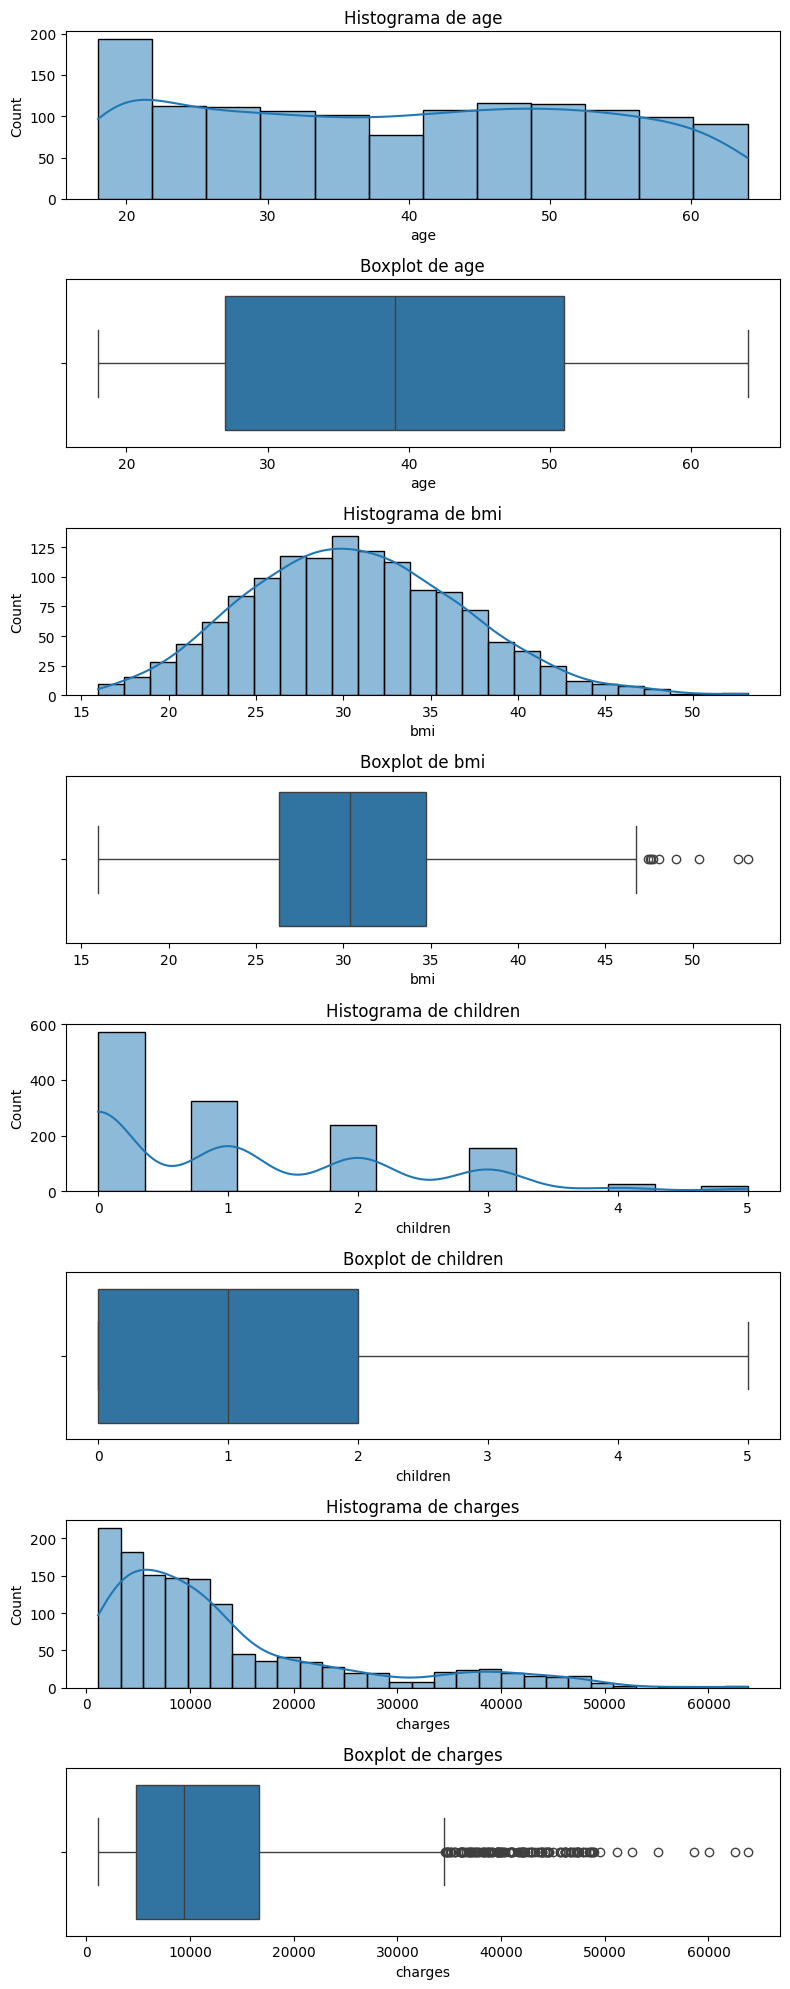

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# SOLO MODIFICAR COLUMNAS QUE SE QUIERAN EXCLUIR DE LAS NUMERICAS [ NO HACER CASO: Eran los IDs y ya se han eliminado]
column_filter= data.select_dtypes(include='number').drop(columns=[''], errors='ignore').columns
# Crear la figura con 2 columnas y una fila por variable
fig, axes = plt.subplots(len(column_filter)*2, 1, figsize=(8, len(column_filter) * 5))

# Iterar sobre cada columna del DataFrame
for i, col in enumerate(column_filter):
    idx=i*2
    # Histograma en la primera fila
    sns.histplot(data=data, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histograma de {col}')
    
    # set_limitx -> ajustar gráficos si interesa. Ver si sería interesante hacerlo
    # if col in x_limits:
    #     axis[idx+1].set_xlim(x_limits[col])

    # Boxplot en la segunda fila
    sns.boxplot(data=data, x=col, ax=axes[idx+1])
    axes[idx+1].set_title(f'Boxplot de {col}')
    

# Ajustar diseño
plt.tight_layout()
plt.show()

In [22]:
data.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [23]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- age: Se observa una proporción igual de personas en las diferentes edades.
- bmi: Se observa que sigue una distribución normal, con media de 30,66.
- children: Se observa que personas con 0 niños es el valor más grande y se reduce conforme se incrementa el número.
- charges: Se observa que sigue una distribución normal sesgada a la izquierda.



La combinación de los dos gráficos anteriores por cada variable nos permite conocer la distribución y sus características estadísticas. De la visualización resultante podemos ver que ambas variables tienen valores que siguen una distribución normal.

### Paso 4: Análisis de variables multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos para averiguar si el cliente contrata un deposito a largo plazo o no. 

#### Análisis numérico-numérico

Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.
##### charges - ('age', 'bmi', 'children')

In [24]:
data.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

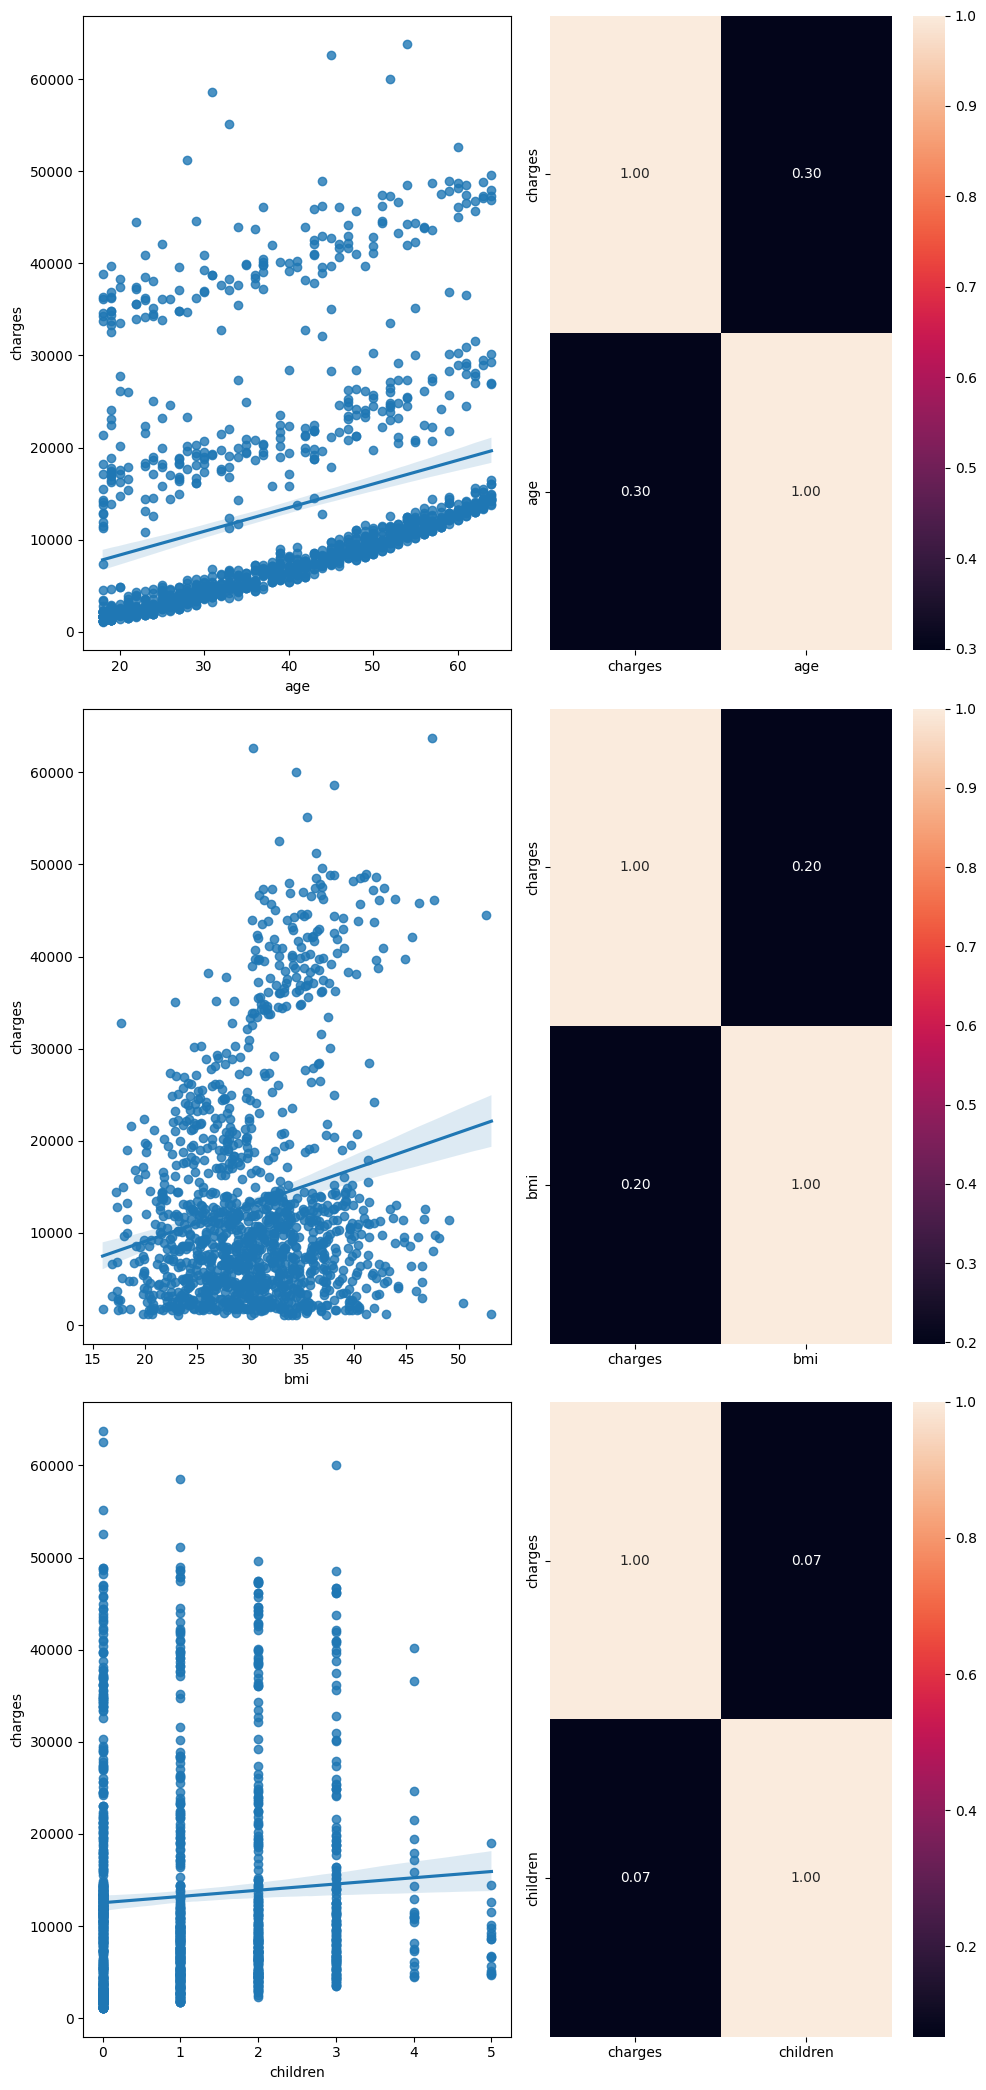

In [25]:
# Automatizado para solo filtrar los numericos a numericos y excluir que se compare el objetivo o clase a predecir, es decir, price consigo mismo
if(target):
    

    # if pd.api.types.is_numeric_dtype(data[target]):
    #     print("La columna es numérica.")
    # else:
    #     print("La columna NO es numérica.")
    #data[target] = data[target].map({"yes": 1, "no": 0})    # es necesario para que sea numérico, ver si se podría hacer más arriba. Preguntar. Se debe de factorizar guardando
    column_filter= data.select_dtypes(include='number').drop(columns=[target], errors='ignore').columns
    fig, axis = plt.subplots(len(column_filter), 2, figsize = (10, 7*(len(column_filter))))

    # Crear un diagrama de dispersión múltiple y la matriz de correlación entre las dos variables (predictora-target)
    for i,col in enumerate(column_filter):
        sns.regplot(ax = axis[i, 0], data = data, x = col, y = target)
        sns.heatmap(data[[target, col]].corr(), annot = True, fmt = ".2f", ax = axis[i,1], cbar = True)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()
else:
    print(f"target {target} está vacío, se debe especificar el target para poder representar.")

- `age`: Se observa una correlación con el target de 0,3. A mayor edad más prima del seguro tiene que pagar (lógico).
- ``bmi``: Se observa una correlación moderada del 0,2 y presenta una ligera pendiente, por lo que existe una correlación con el target. A mayor bmi (índice de masa corporal) más probabilidades de que la prima del seguro (charges) sea más alta.
- `children`: No presenta una correlación con el target. Tiene poca pendiente.

#### Análisis categórico-categórico 

In [26]:
categorical_variable

['sex', 'smoker', 'region']

In [27]:
if(target):
    if(pd.api.types.is_numeric_dtype(data[target])):    # es numérico
        print("El target es numérico y por tanto no es necesario hacer el análisis categórico-categórico")
    else:
        n_rows = (len(categorical_variable)+2) // 3 + 1
        n_cols = 3
        fig, axis = plt.subplots(n_rows, n_cols, figsize = (15, n_rows*5))
        category_counts = data[col].value_counts() # Contar las categorías en la columna.
            
        # Crear un histograma de cada variable categórica predictora con la variable target categórica
        for i,col in enumerate(categorical_variable):
            idx = i // n_cols
            j = i % 3
            sns.countplot(ax=axis[idx,j], data = data, x = col, hue = target)
            #Mostrar etiquetas del eje x para mejorar la legibilidad
            axis[idx, j].tick_params(axis='x', rotation=75)
        # Eliminar subgráficos vacíos (si los hay)
        for i in range(len(categorical_variable), n_rows*n_cols):
            idx = i // n_cols  # Fila vacía
            j = i % n_cols   # Columna vacía
            fig.delaxes(axis[idx][j])
        # Ajustar el layout
        plt.tight_layout()

        # Mostrar el plot
        plt.show()

else:
    print(f"target {target} está vacío, se debe especificar el target para poder representar.")


El target es numérico y por tanto no es necesario hacer el análisis categórico-categórico


In [28]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##### Combinaciones de la clase con varias predictoras

In [30]:
categorical_variable

['sex', 'smoker', 'region']

In [31]:
factors_associated_target

[]

In [33]:
# GENERO LAS GRÁFICAS DEL TARGET CON VARIAS PREDICTORAS Y CON AQUELLA QUE SE CONSIDERA SUBJETIVAMENTE QUE PUEDE SER INTERESANTE
import time
relevant_variables = []
if(categorical_variable and factors_associated_target):
    start_time = time.time()
    # Generar combinaciones de gráficos entre las variables categóricas y los factores asociados al target
    combinations = list(itertools.product(relevant_variables, factors_associated_target))

    # Separar las combinaciones en impares y pares
    # combinations_odd = combinations[::2]  # Combinaciones pares
    # combinations_even = combinations[1::2]  # Combinaciones impares

    # Crear la figura con suficiente espacio para los subgráficos (evitar llamar a plt.subplots repetidamente)
    fig, axis = plt.subplots(len(combinations), 1, figsize=(8, 5*len(combinations)))

    # Asegurarse de que 'axis' sea un arreglo 1D
    axis = axis.flatten() if isinstance(axis, np.ndarray) and axis.ndim > 1 else axis

    end_time = time.time()
    # Graficar todas las combinaciones en un solo bucle (sin dividir en pares e impares)
    for i, (col, factor) in enumerate(combinations):
        data[factor] = data[factor].astype('category')
        sns.barplot(ax=axis[i], data=data, x=col, y=target, hue=factor)
        axis[i].set_title(f'Barplot de {col} y {factor}')
        #categories = data[factor].unique()
        axis[i].legend(loc="upper right")
        #Mostrar etiquetas del eje x para mejorar la legibilidad
        axis[i].tick_params(axis='x', rotation=75)
    print(f"tiempo:{end_time - start_time}")
    plt.tight_layout()
    plt.show()

elif(categorical_variable):
    print("categorical_variable está vacío, debe llenarse para poder representarse")
else:
    print("factors_associated_target está vacío, debe llenarse para poder representarse")

categorical_variable está vacío, debe llenarse para poder representarse


Hay muy pocas columnas, no se observa una relación tan importante como para representarla. Además, como se ha mencionado el target es una variable numérica.

##### Análisis de correlaciones

In [34]:
import json
categorical_variable_list = []

for cat in categorical_variable:

  data[f"{cat}_n"] = pd.factorize(data[cat])[0]
  categorical_variable_list.append(f"{cat}_n")
  transformation_rules = {row[cat]: row[f"{cat}_n"] for _, row in data[[cat, f"{cat}_n"]].drop_duplicates().iterrows()}

  with open(os.path.join(path_config,f"{cat}_transformation_rules.json"), "w") as f:
    json.dump(transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:
# 
# with open("Sport_transformation_rules.json", "r") as f:
#   Sport_transformation_rules = json.load(f)

# data["Sport_n"] = data["Sport"].apply(lambda x: Sport_transformation_rules[x])



C:\Users\mamen\AppData\Local\Temp\ipykernel_11684\1236807315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{cat}_n"] = pd.factorize(data[cat])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_11684\1236807315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{cat}_n"] = pd.factorize(data[cat])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_11684\1236807315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [35]:
data

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


Análisis de correlación de variables categóricas

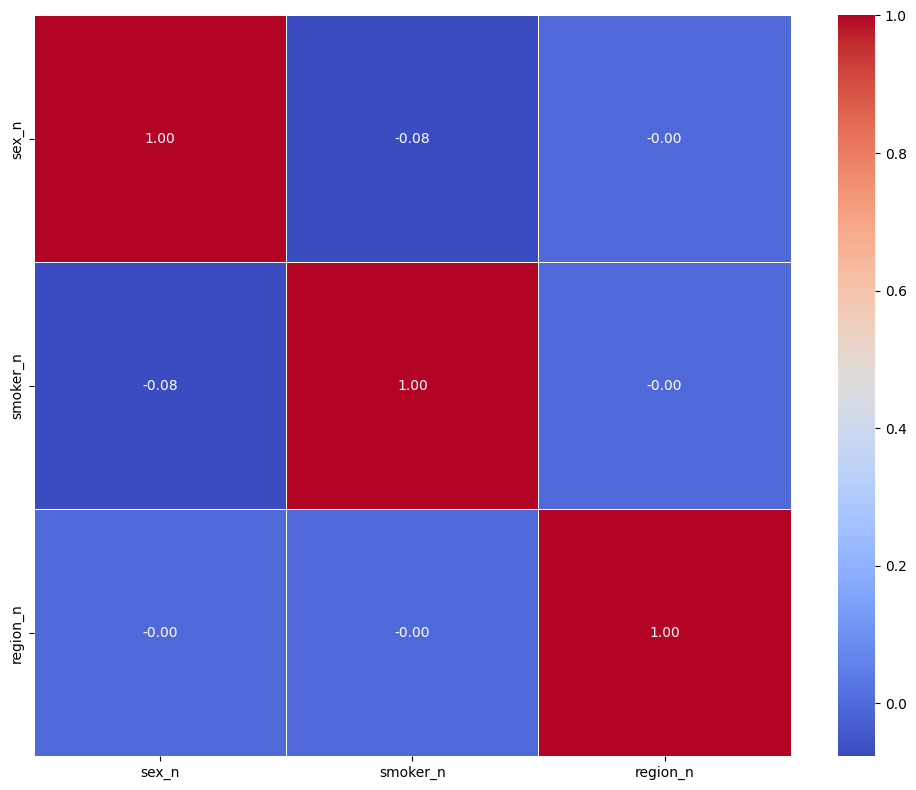

In [36]:
    
corr_matrix = data[categorical_variable_list].corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.tight_layout()

plt.show()

El análisis de correlaciones categóricas se puede desglosar en aquellas que presentan una correlación positiva y aquellas que presentan una correlación negativa.

* Se observa que presentan un valor negativo, pero no se observa que haya una correlación entre ninguna de las predictoras categóricas.

Finalmente, para cerrar el estudio multivariante queda analizar la relación entre las variables categóricas y numéricas.

#### Análisis numérico-categórico (completo)

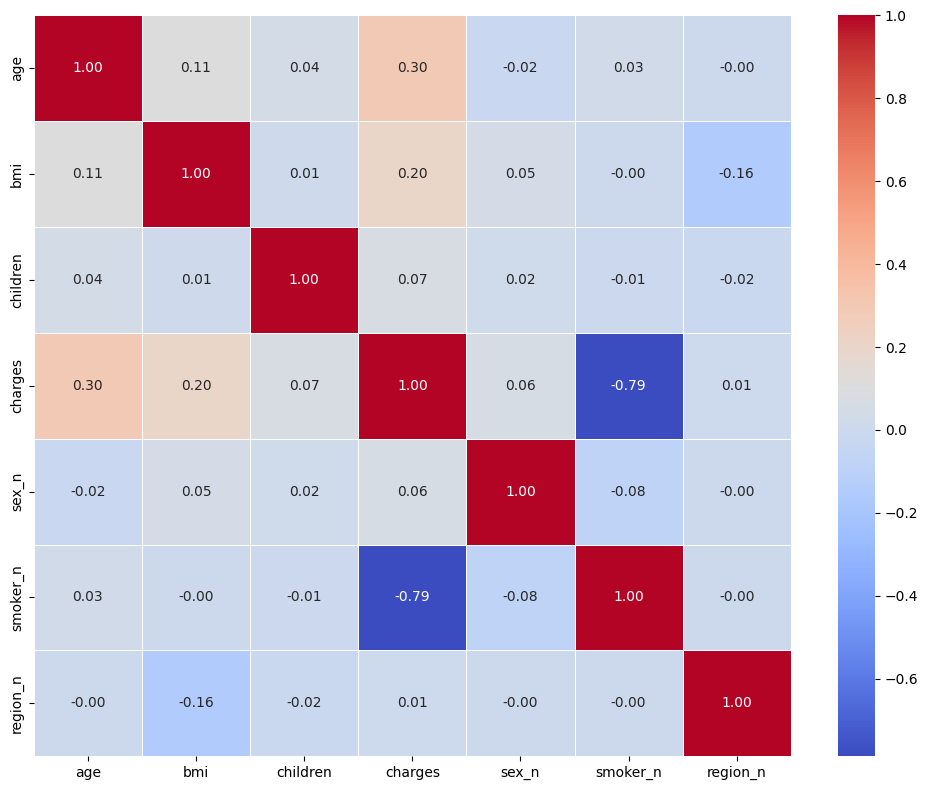

In [37]:
corr_matrix = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.tight_layout()

plt.show()

In [38]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

El análisis de correlaciones refleja una fuerte relación directa entre los siguientes pares de correlaciones. Se presentan a continuación:

`age`: Presenta una fuerte correlación con el target. Como se ha mencionado antes al aumentar la edad tiene sentido que aumente la prima de forma moderada. 
* `bmi`: Indica el índice de masa corporal, y se observa una ligera correlación (0,2) con el target como se ha mencionado antes. Personas con un mayor IMC pueden tener primas más altas
* `smoker`: Se observa una correlación inversa alta con el target. Es decir, ser fumador tiene un fuerte impacto en el costo del seguro.


***



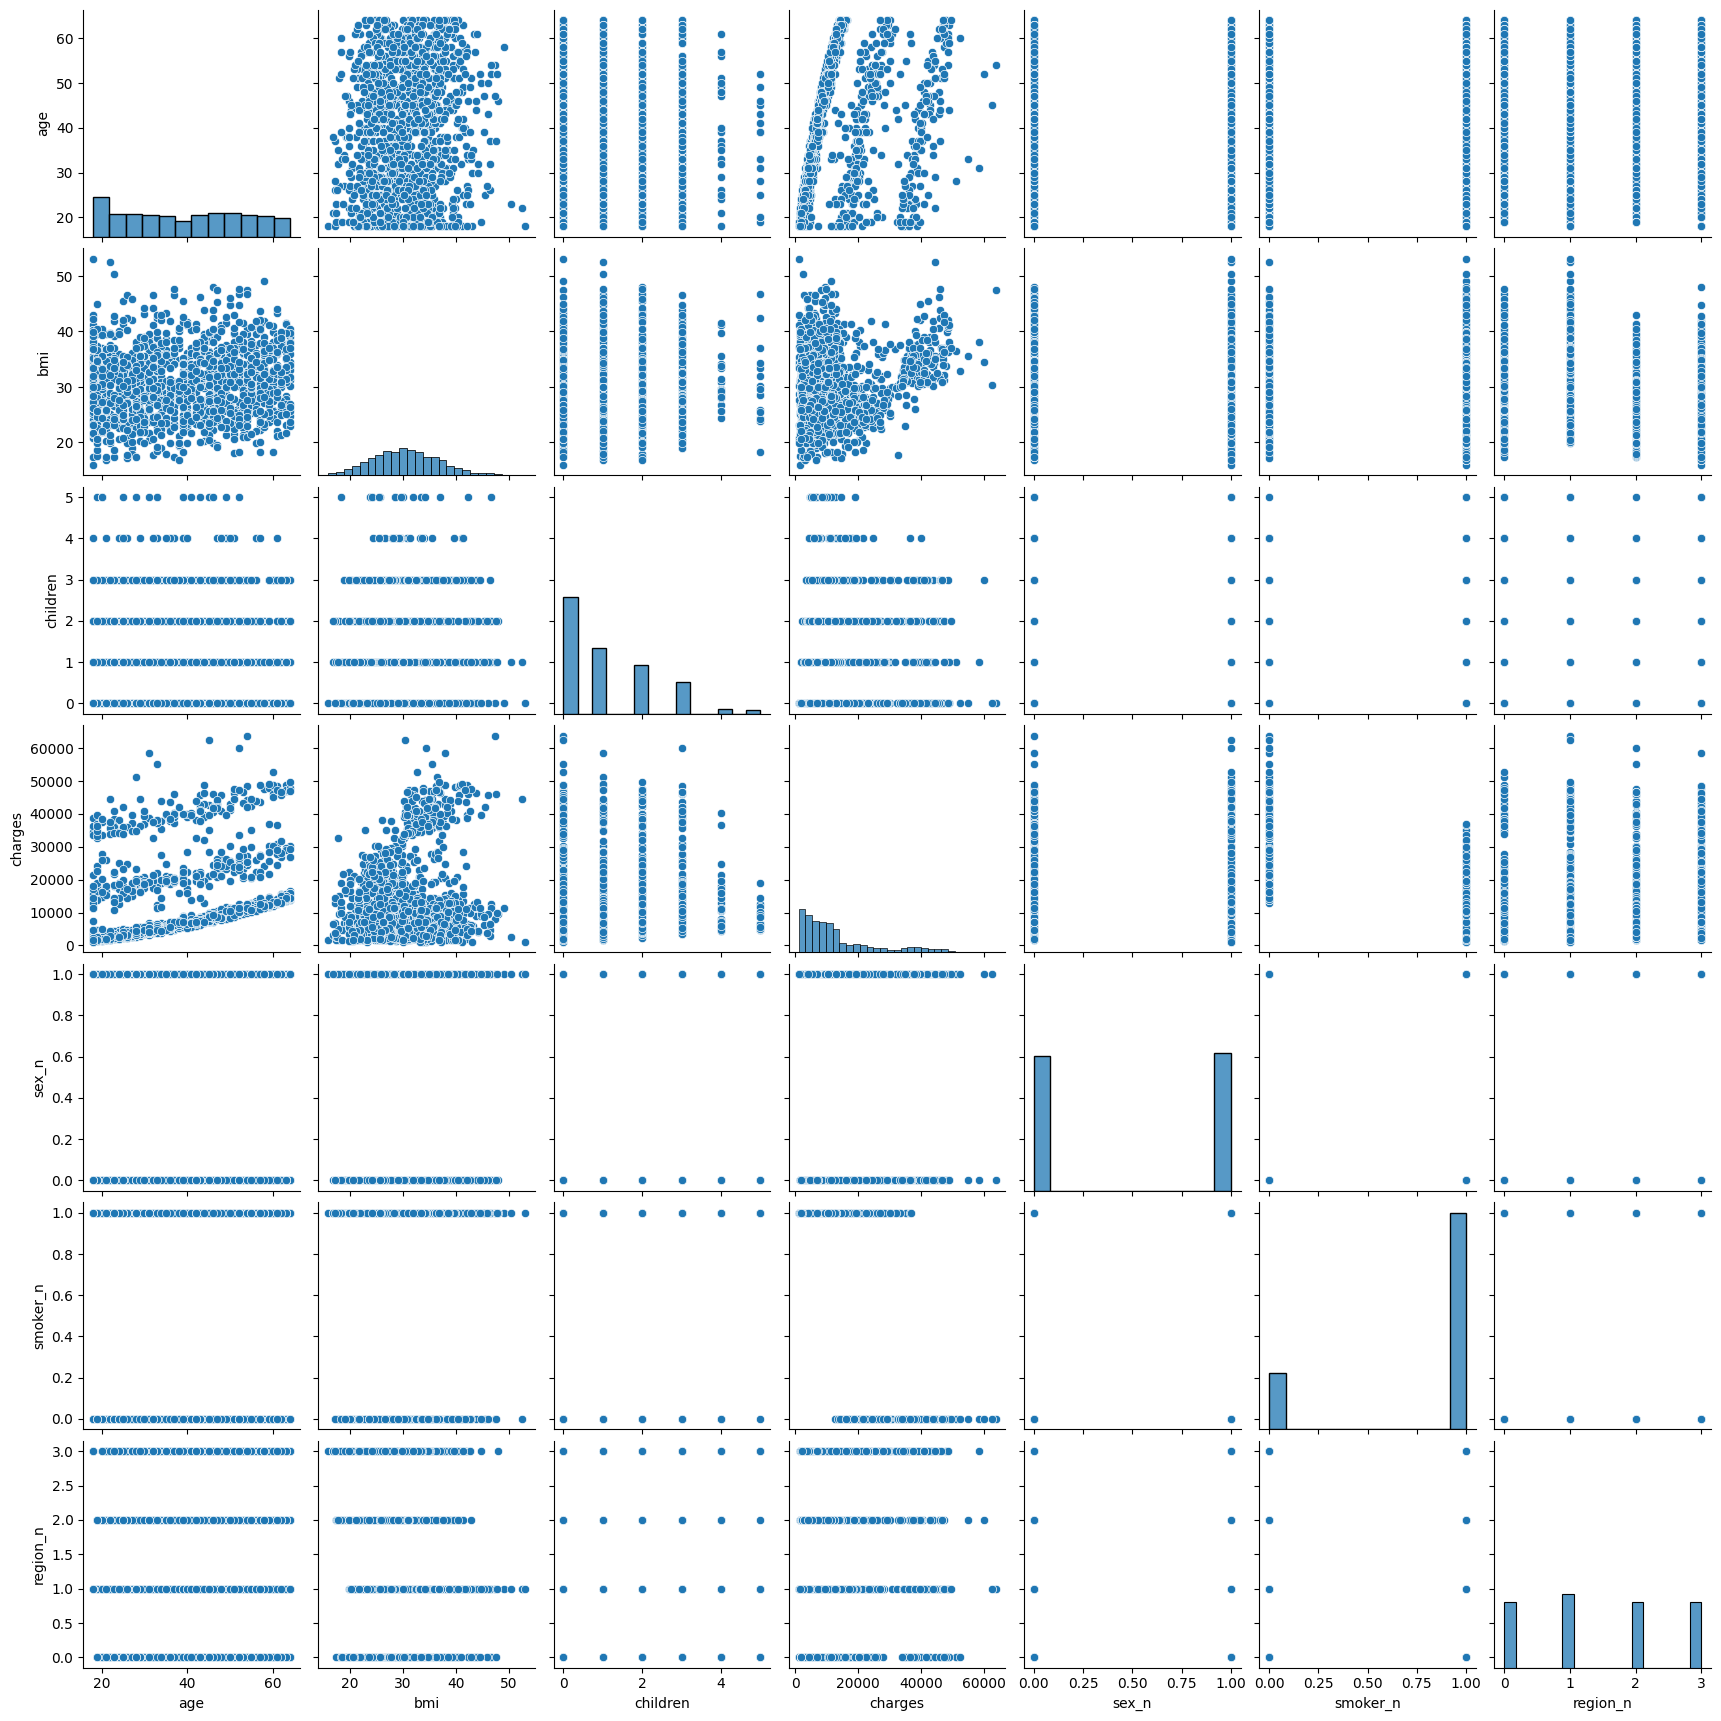

In [39]:
sns.pairplot(data = data)

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [40]:
data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [41]:
columns_number = data.select_dtypes(include='number')

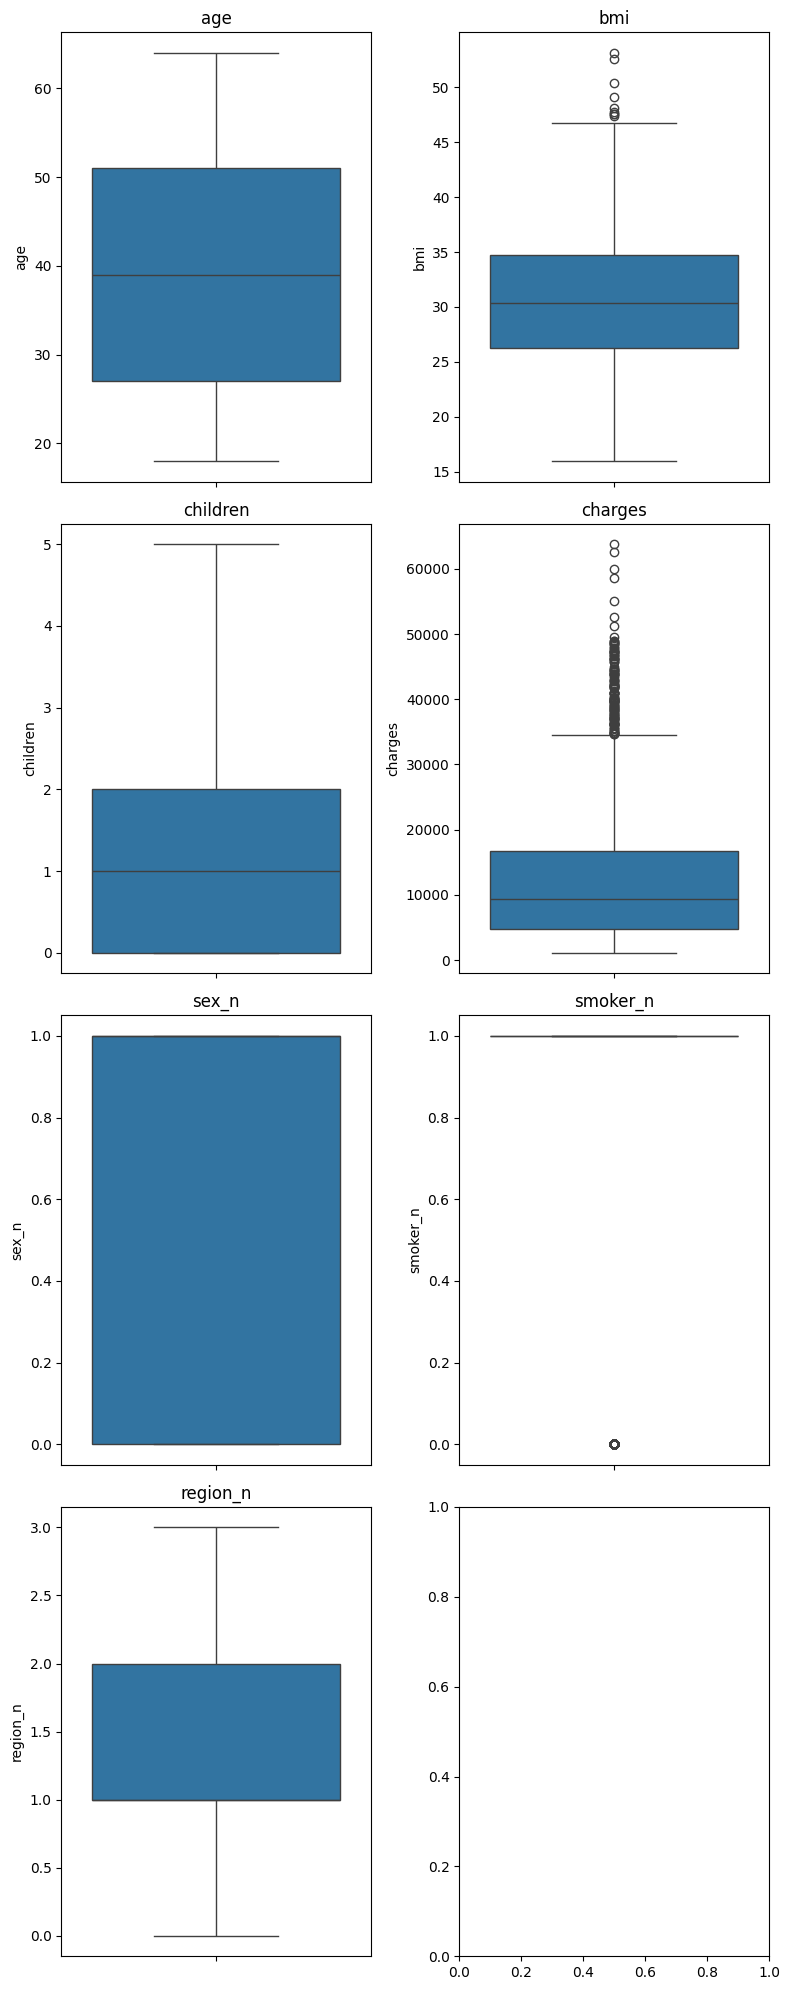

In [42]:
# Separar los gráficos en impares y pares
columns_odd = [col for i, col in enumerate(columns_number) if i % 2 != 0]  # Gráficos con índice impar (1, 3, 5,...)
columns_even = [col for i, col in enumerate(columns_number) if i % 2 == 0]  # Gráficos con índice par (0, 2, 4,...)

# Número de filas necesarias (igual a la cantidad máxima de gráficos en ambos grupos)
num_rows = max(len(columns_odd), len(columns_even))

# Crear la figura y los subgráficos
fig, axis = plt.subplots(num_rows, 2, figsize=(8, 5*num_rows))

# Graficar los gráficos impares (a la izquierda)
for i, col in enumerate(columns_even):
    sns.boxplot(ax=axis[i, 0], data=data, y=col)
    axis[i, 0].set_title(col)

# Graficar los gráficos pares (a la derecha)
for i, col in enumerate(columns_odd):
    sns.boxplot(ax=axis[i, 1], data=data, y=col)
    axis[i, 1].set_title(col)

# sns.boxplot(ax = axis[0, 1], data = data, y = "minimum_nights")
# sns.boxplot(ax = axis[0, 2], data = data, y = "number_of_reviews")
# sns.boxplot(ax = axis[1, 0], data = data, y = "reviews_per_month")
# sns.boxplot(ax = axis[1, 1], data = data, y = "calculated_host_listings_count")
# sns.boxplot(ax = axis[1, 2], data = data, y = "availability_365")
# sns.boxplot(ax = axis[2, 0], data = data, y = "neighbourhood_group_n")
# sns.boxplot(ax = axis[2, 1], data = data, y = "room_type_n")
# sns.boxplot(ax = axis[2, 2], data = data, y = "neighbourhood_n")

plt.tight_layout()

plt.show()

In [43]:
data.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n'], dtype='object')

In [44]:
import json

total_data_con_outliers = data.copy()
total_data_sin_outliers = data.copy()
def convert_to_standard_types(obj):
  if isinstance(obj, np.int64):  # Convertir numpy.int64 a int
      return int(obj)
  elif isinstance(obj, np.float64):  # Convertir numpy.float64 a float
      return float(obj)
  
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  
  column_iqr = column_stats["75%"] - column_stats["25%"]
  # print("Column IQR:",column_iqr)
  # print("25%:",column_stats["25%"])
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  lower_limit = max(df[column].min(),lower_limit)
  #print(lower_limit)
  
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  
  return df.copy(), [lower_limit, upper_limit]
def replace_outliers_from_column_with_clip(column, df):
  column_stats = df[column].describe()
  
  column_iqr = column_stats["75%"] - column_stats["25%"]
  # print("Column IQR:",column_iqr)
  # print("25%:",column_stats["25%"])
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  lower_limit = max(df[column].min(),lower_limit)
  # print(lower_limit)
  
  # Remove upper outliers
  df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
  
  
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in columns_number:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

outliers_dict_standard = convert_to_standard_types(outliers_dict)

with open(path_config+"/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict_standard, f)
outliers_dict

{'age': [np.int64(18), np.float64(87.0)],
 'bmi': [np.float64(15.96), np.float64(47.31500000000001)],
 'children': [np.int64(0), np.float64(5.0)],
 'charges': [np.float64(1121.8739), np.float64(34524.777625)],
 'sex_n': [np.int64(0), np.float64(2.5)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)],
 'region_n': [np.int64(0), np.float64(3.5)]}

In [45]:
total_data_sin_outliers.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
sex_n         int64
smoker_n    float64
region_n      int64
dtype: object

In [46]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [47]:
columns_na_con_outliers = total_data_con_outliers.loc[:,total_data_con_outliers.isnull().any()].columns



In [48]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [49]:
columns_na_sin_outliers = total_data_sin_outliers.loc[:,total_data_sin_outliers.isnull().any()].columns

In [50]:
def replace_na_with_mean(columns_na_outliers, total_data, con_outliers="con"):
    total_data = total_data.copy()
    for na_outlier in columns_na_outliers:
        if na_outlier in total_data.columns:    # si la columna no está en el DF
            total_data[na_outlier] = total_data[na_outlier].fillna(
                total_data[na_outlier].mean()
            )
        else:
            print("La columna no se encuentra en el DataFrame: Revisa que tiene los nombres correctos")
    print(f"Se han rellenado los NAs en total_data_{con_outliers}_outliers")
    return total_data

if(not columns_na_con_outliers.empty):
    total_data_con_outliers = replace_na_with_mean(columns_na_con_outliers,total_data=total_data_con_outliers)
if(not columns_na_sin_outliers.empty):    
    total_data_sin_outliers = replace_na_with_mean(columns_na_sin_outliers, total_data=total_data_sin_outliers,con_outliers="sin")

In [51]:
total_data_con_outliers.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [52]:
total_data_sin_outliers.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Vemos cómo los valores han sido imputados correctamente y ya no existen faltantes.

#### Inferencia de nuevas características

Otro uso típico en esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes. Uniendo estas dos variables y sumándolas/multiplicando/operación matemática/etc podemos obtener una tercera. En nuestro caso no lo hacemos ya que son variables que no se podría hacer dicha fusión. 

`¿Sería posible concatenar los números de aquellas categóricas? En principio si¿Habría que hacerlo en aquellas con una alta correlación entre sí? No tiene nada que ver con la correlación ¿se mantendrían el resto de variables de antes de la fusión? No se mantendrían`

In [53]:
total_data_con_outliers.sort_values(by=target ,ascending=False)

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
543,54,female,47.410,0,yes,southeast,63770.42801,0,0,1
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1230,52,male,34.485,3,yes,northwest,60021.39897,1,0,2
577,31,female,38.095,1,yes,northeast,58571.07448,0,0,3
819,33,female,35.530,0,yes,northwest,55135.40209,0,0,2
...,...,...,...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100,1,1,1
663,18,male,33.660,0,no,southeast,1136.39940,1,1,1
1244,18,male,33.330,0,no,southeast,1135.94070,1,1,1
808,18,male,30.140,0,no,southeast,1131.50660,1,1,1


In [54]:
# DEFINIR LA INFERENCIA DE LA NUEVA CARACTERÍSTICA [NECESARIO FACTOR HUMANO - OPCIONAL]]
# Inferencia de nuevas características




No se realiza la fusión de nuevas características.

In [55]:
columns_drop = []


#### Escalado de valores

In [56]:
from sklearn.model_selection import train_test_split

#num_variables = total_data_con_outliers.select_dtypes(include='number').drop(columns=[target] + exclude_new_features).columns.to_list()
num_variables = total_data_con_outliers.select_dtypes(include='number').drop(columns=[target]+ columns_drop).columns.to_list()
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop(columns=target, axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop(columns=target, axis = 1)[num_variables]
y = total_data_con_outliers[target]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)



# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_train_con_outliers.xlsx"), index = False)
X_train_sin_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_train_sin_outliers.xlsx"), index = False)
X_test_con_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_test_con_outliers.xlsx"), index = False)
X_test_sin_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_test_sin_outliers.xlsx"), index = False)
y_train.to_excel(os.path.join(current_dir,"../data/processed/y_train.xlsx"), index = False)
y_test.to_excel(os.path.join(current_dir,"../data/processed/y_test.xlsx"), index = False)

X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,23,24.510,0,1,1,3
968,21,25.745,2,1,1,3
599,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


#### Normalización Funciones

In [57]:
import pickle
from sklearn.preprocessing import StandardScaler
print(type(X_train_con_outliers),type(X_test_con_outliers))
def normalize_dataframe_and_save(type_scaler, X_train, X_test, num_variables, scaler="Standard", con_outliers = "con"):
    ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
    #scaler_con_outliers = StandardScaler()
    type_scaler.fit(X_train)
    os.makedirs(os.path.join(current_dir,f"../models/"), exist_ok=True)
    
    with open(f"../models/scaler_{con_outliers}_outliers_{scaler.lower()}.pkl", "wb") as file:
        pickle.dump(type_scaler, file)
    X_train_norm = type_scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

    X_test_norm = type_scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

    # GUARDAR LOS DATASETS
    if((scaler.lower() == "standard") | (scaler.lower() == "minmax")):
        X_train_norm.to_excel(os.path.join(current_dir,f"../data/processed/X_train_{con_outliers}_outliers_norm_{scaler.lower()}.xlsx"), index = False)
        X_test_norm.to_excel(os.path.join(current_dir,f"../data/processed/X_test_{con_outliers}_outliers_norm_{scaler.lower()}.xlsx"), index = False)
    else:
        print("Error al indicar el escalado")
    return X_train_norm.copy(), X_test_norm.copy()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


##### Normalización

Escalado Con Outliers

In [58]:
type_scaler = StandardScaler()
# Normalización Estándar Con Outliers
print(type(type_scaler))
X_train_con_outliers_norm_standard, X_test_con_outliers_norm_standard = normalize_dataframe_and_save(
    type_scaler=type_scaler, 
    X_train = X_train_con_outliers, 
    X_test = X_test_con_outliers, 
    num_variables = num_variables, 
    scaler="Standard",
    con_outliers = "con")
X_train_con_outliers_norm_standard.head()
# Normalización Estándar Sin Outliers
X_train_sin_outliers_norm_standard, X_test_sin_outliers_norm_standard = normalize_dataframe_and_save(
    type_scaler=type_scaler, 
    X_train = X_train_sin_outliers, 
    X_test = X_test_sin_outliers, 
    num_variables = num_variables, 
    scaler="Standard",
    con_outliers = "sin")
# Print Xtrain con Outliers normalizado
X_train_sin_outliers_norm_standard.head()

<class 'sklearn.preprocessing._data.StandardScaler'>


,age,bmi,children,sex_n,smoker_n,region_n
1114,-1.157680,-1.002462,-0.907908,0.971409,0.0,1.383946
968,-1.300619,-0.796635,0.766904,0.971409,0.0,1.383946
599,0.914926,1.166632,0.766904,-1.029432,0.0,0.477983
170,1.701087,1.824110,-0.907908,0.971409,0.0,-0.427981
275,0.557580,-0.654140,0.766904,-1.029432,0.0,1.383946


In [59]:
## APUNTES
# from sklearn.preprocessing import StandardScaler

# ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
# scaler_con_outliers = StandardScaler()
# scaler_con_outliers.fit(X_train_con_outliers)

# X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
# X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

# X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
# X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
# X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

# ### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
# scaler_sin_outliers = StandardScaler()
# scaler_sin_outliers.fit(X_train_sin_outliers)

# X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
# X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

# X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
# X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
# X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

# X_train_con_outliers_norm.head()

##### Escalado Mínimo-Máximo

In [60]:
from sklearn.preprocessing import MinMaxScaler
type_scaler = MinMaxScaler()
print(type(type_scaler))
# Escalado Min-Max con outliers - Acotado entre 0-1
X_train_con_outliers_norm_minmax, X_test_con_outliers_norm_minmax = normalize_dataframe_and_save(
    type_scaler = type_scaler, 
    X_train = X_train_con_outliers, 
    X_test = X_test_con_outliers, 
    num_variables = num_variables, 
    scaler="MinMax",
    con_outliers = "con")
# Escalado Min-Max sin outliers - Acotado entre 0-1
X_train_sin_outliers_norm_minmax, X_test_sin_outliers_norm_minmax = normalize_dataframe_and_save(
    type_scaler = type_scaler, 
    X_train = X_train_sin_outliers, 
    X_test = X_test_sin_outliers, 
    num_variables = num_variables, 
    scaler="MinMax",
    con_outliers = "sin")
# Print data
X_train_sin_outliers_norm_minmax.head()

<class 'sklearn.preprocessing._data.MinMaxScaler'>


,age,bmi,children,sex_n,smoker_n,region_n
1114,0.108696,0.272684,0.0,1.0,0.0,1.000000
968,0.065217,0.312071,0.4,1.0,0.0,1.000000
599,0.739130,0.687769,0.4,0.0,0.0,0.666667
170,0.978261,0.813586,0.0,1.0,0.0,0.333333
275,0.630435,0.339340,0.4,0.0,0.0,1.000000


In [61]:
## APUNTES
# from sklearn.preprocessing import MinMaxScaler

# ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
# scaler_con_outliers = MinMaxScaler()
# scaler_con_outliers.fit(X_train_con_outliers)

# X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
# X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

# X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
# X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
# X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

# ### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
# scaler_sin_outliers = StandardScaler()
# scaler_sin_outliers.fit(X_train_sin_outliers)

# X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
# X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

# X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
# X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
# X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

# X_train_con_outliers_scal.head()

## DÍA 3

### Paso 6: Selección de características

La **selección de características** (*feature selection*) es un proceso que implica seleccionar las características (variables) más relevantes de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning, desechando el resto.

Existen varias razones para incluirlo en nuestro análisis exploratorio:

1. Simplificar el modelo para que sea más fácil de entender e interpretar.
2. Reducir el tiempo de entrenamiento del modelo.
3. Evitar el sobre ajuste al reducir la dimensionalidad del modelo y minimizar el ruido y las correlaciones innecesarias.
4. Mejorar el rendimiento del modelo al eliminar las características irrelevantes.

Además, existen diversas técnicas para la selección de características. Muchas de ellas se basan a su vez en modelos supervisados, entrenados o de clustering, tienes más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.es.md).

La librería `sklearn` contiene gran parte de las mejores alternativas para llevarla a cabo. Una de las herramientas que más se utilizan para realizar procesos de selección de características rápidos y con buenos resultados es `SelectKBest`. Esta función selecciona las `k` mejores características de nuestro conjunto de datos basándose en una función de un test estadístico. Este test estadístico normalmente es un ANOVA o un Chi-Cuadrado:

In [62]:
from sklearn.feature_selection import f_classif, SelectKBest
def select_characteristics(X_train_con_outliers, X_test_con_outliers, y_train, y_test, k = 5, with_outliers="with_outliers", with_norm="standard"):
  # Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
  k = min(k, X_train_con_outliers.shape[1]) # asegurar que el mínimo sea 5 o el mínimo de columnas que haya, por si hay menos
  selection_model = SelectKBest(f_classif, k = k)
  selection_model.fit(X_train_con_outliers, y_train)

  ix = selection_model.get_support()
  X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
  X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

  # GUARDO X_train_sel.columns

  # name_files = ["with_outliers_without_norm", "without_outliers_without_norm","with_outliers_with_norm", "without_outliers_with_norm"] # name files
  # for col in name_files:

  with open(path_config+f"/feature_selection_k_{k}_{with_outliers}_with_norm_{with_norm}.json", "w") as f:
    json.dump(X_train_sel.columns.tolist(), f)
  # GUARDO EL "Y" EN EL DATAFRAME
  X_train_sel = X_train_sel.copy()
  X_test_sel = X_test_sel.copy()
  # X_train_sel[target] = list(y_train)
  # X_test_sel[target] = list(y_test)
  # GUARDAR EL ARCHIVO LIMPIO
  
  os.makedirs(os.path.join(current_dir,f"../data/processed/assets"), exist_ok=True)
  X_train_sel.to_csv(os.path.join(current_dir,f"../data/processed/assets/clean_{with_outliers}_with_norm_{with_norm}_train.csv"), index=False)
  X_test_sel.to_csv(os.path.join(current_dir,f"../data/processed/assets/clean_{with_outliers}_with_norm_{with_norm}_test.csv"), index=False)

  return X_train_sel, X_test_sel

La selección de características, al igual que el entrenamiento del modelo en general, se debe realizar solo en el conjunto de datos de entrenamiento y no en la totalidad. Si la llevásemos a cabo en todo el conjunto, podríamos introducir un sesgo que se conoce como **contaminación de datos** (*data leakage*), que ocurre cuando la información del conjunto de prueba se utiliza para tomar decisiones durante el entrenamiento, lo que puede llevar a una estimación demasiado optimista del rendimiento del modelo.

Por eso, la mejor práctica es dividir los datos en dos conjuntos: de entrenamiento y de prueba antes de la selección de características, que se realizará solo con los datos de entrenamiento y que luego se aplicará a ambos. De esta manera, aseguramos que este proceso y el modelo están siendo validados de manera justa.

En este caso, utilizando la selección de características de Chi cuadrado, las características más importantes son `Pclass`, `Sex`, `Parch`, `Fare` y `Embarked`.

## FIN DEL DÍA 3

Ahora ya conocemos cómo llevar a cabo un estudio profundo y en detalle para conocer completamente nuestro conjunto de datos. Recordemos los pasos que tenemos que seguir para llevarlo a cabo:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.